In [17]:
from os.path import join
import numpy as np
import nibabel as nib
import torch
from fastai.basic_train import load_learner
from matplotlib import pyplot as plt
import os
import json
%matplotlib inline

In [2]:
from SubSegmentation.lovasz import *
from SubSegmentation.processing_utils import *

In [3]:
import CBD_BBD
import msl

In [4]:
IMAGE_SIZE = (160, 160)
MODEL_NAME = 'model-160-rotate-lovasz-180'

In [5]:
torch.cuda.set_device(0)

In [30]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [6]:
def predict_nifti(img_data, filename, learner):
    images, min_ax, zeros, x_ax, y_ax = pre_processing(img_data, IMAGE_SIZE)
    segmentations_result = []

    for image in images:
        pred_class, pred_idx, outputs = learner.predict(image)
        segmentations_result.append(pred_idx.data.squeeze())
        
    seg_img = post_processing(segmentations_result, min_ax, zeros, x_ax, y_ax, filename)

In [7]:
learn = load_learner(join('/home/ori/Projects/models'), MODEL_NAME)

In [32]:
data =nib.load("/media/df3-dafna/Netanell/DemoCode/cropped.nii").get_fdata()
predict_nifti(data.transpose([1,2,0]).copy(), "/media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422.out.nii", learn)

(145, 146, 18)


In [31]:
data.shape

(145, 146, 18)

In [29]:
data.shape

(147, 164, 18)

In [16]:
fullseg = nib.load("/media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5_roi_pred_pp.nii.gz").get_fdata()
subseg = nib.load("/media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422.out.nii").get_fdata()

In [13]:
msl_p_planes = msl.find_planes(data,subseg)
msl_p_points = msl.findMSLforAllPlanes(data, subseg, msl_p_planes)

0.3997053288662114
4.387715365723272
2.251071114722053
1.3739097347298106
1.2590697626175165
4.99566536546995
1.9441422243102393
2.3245960383123805
1.988118096697261
1.9997993743642317
4.4227791726205155
1.3875201042092546
1.0003679891716255
0.6666683754574474
0.9999999999993889
1.019800259250033
0.3333333333333286
0.11020103663866097


66.05579999999999 71.2512
66.15995945161997 69.86542709552415
66.83509969738954 72.76967263166709
69.02459999999999 73.4778
69.86542709552415 76.53661981404719


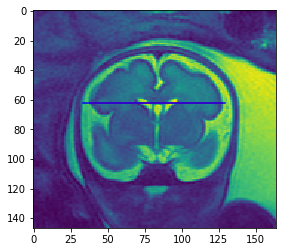

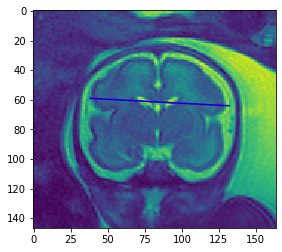

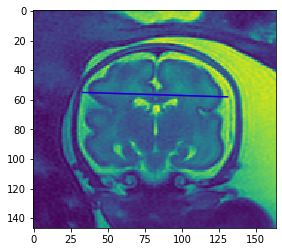

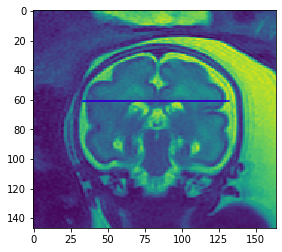

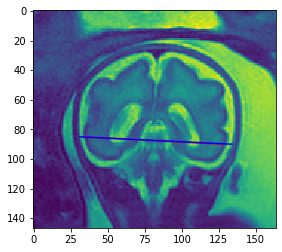

In [26]:
BBD_PLANE = 9
for bb in range(BBD_PLANE - 2 - 1, BBD_PLANE + 2 ):
    p_u, p_d, _ = msl_p_points[bb]
    CBD_left, CBD_right, m_CBD_x, m_CBD_y = CBD_BBD.CBD_points(fullseg[:,:,bb], data[:,:,bb], p_u.astype(int), p_d.astype(int), 0.7422, 0.7422)
    _,_, BBD_left, BBD_right, _,_ = CBD_BBD.BBD_points(data[:,:,bb], CBD_left, CBD_right, m_CBD_x, m_CBD_y) 
    print (np.linalg.norm(CBD_left- CBD_right) * 0.7422, np.linalg.norm(BBD_left- BBD_right) * 0.7422)
    plt.figure()
    plt.imshow(data[:,:,bb])
    cbd = np.stack([CBD_left,CBD_right]).T
    plt.plot(cbd[1,:], cbd[0,:], 'r')
    bbd = np.stack([BBD_left,BBD_right]).T
    plt.plot(bbd[1,:], bbd[0,:], 'b-')

In [39]:
CBD_left, CBD_right, m_CBD_x, m_CBD_y = CBD_BBD.CBD_points(fullseg[:,:,BBD_PLANE], data[:,:,BBD_PLANE], p_u.astype(int), p_d.astype(int), 0.7422, 0.7422)

In [22]:
data.shape

(147, 164, 18)

In [45]:
_,_, BBD_left, BBD_right, _,_ = CBD_BBD.BBD_points(data[:,:,BBD_PLANE], CBD_left, CBD_right, m_CBD_x, m_CBD_y) 

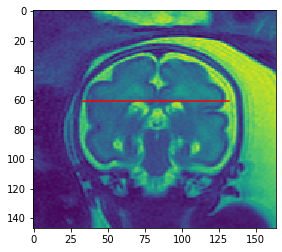

In [46]:
plt.imshow(data[:,:,BBD_PLANE])
bbd = np.stack([BBD_left,BBD_right]).T
plt.plot(bbd[1,:], bbd[0,:], 'r')

In [8]:
import slice_select

In [9]:
sl_bbd = slice_select.SliceSelect(model_file="/home/netanell/work/research/slice_select/models/6/epoch0029_02-02_1249_choose_acc0.9678.statedict.pkl")
sl_tcd = slice_select.SliceSelect(model_file="/home/netanell/work/research/slice_select/models/7/epoch0029_02-02_1430_choose_acc0.9672.statedict.pkl")

In [10]:
## 

## Segmentation

In [11]:
import fetal_seg

Using TensorFlow backend.
/home/netanell/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/netanell/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/netanell/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/netanell/.local/lib/python3.6/site-packages/tensorflo

In [12]:
f = fetal_seg.FetalSegmentation("/media/df3-dafna/Models/Brain_Models/New3DBellaModels/22/", None,
                               "/media/df3-dafna/Models/Brain_Models/New3DBellaModels/24/", None)

First:/media/df3-dafna/Models/Brain_Models/New3DBellaModels/22/epoch_
Loading pre-trained model
Loading model from /media/df3-dafna/Models/Brain_Models/New3DBellaModels/22/epoch_047-loss-0.908_model.hdf5...

Second:/media/df3-dafna/Models/Brain_Models/New3DBellaModels/24/epoch_
Loading pre-trained model
Loading model from /media/df3-dafna/Models/Brain_Models/New3DBellaModels/24/epoch_006-loss-0.959_model.hdf5...


In [4]:
#f.predict("/media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii", "/media/df3-dafna/Netanell/DemoCode/sega")

Loading nifti from /media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii...
Reading: /media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii
Predicting mask...
original_shape: (512, 512, 18)
Applying preprocess by window_1_99...


  0%|          | 0/1 [00:00<?, ?it/s]

Shape: (128, 128, 18)


5it [00:01,  3.12it/s]               
  0%|          | 0/1 [00:00<?, ?it/s]

Applying preprocess by window_1_99...


5it [00:01,  3.19it/s]               


[(196, 200), (192, 192), (0, 0)]
(116, 128, 18)
Saving to /media/df3-dafna/Netanell/DemoCode/sega
Finished.


Loading nifti from /media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii...
Reading: /media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii
Predicting mask...
original_shape: (512, 512, 18)
Applying preprocess by window_1_99...


  0%|          | 0/1 [00:00<?, ?it/s]

Shape: (128, 128, 18)


5it [00:01,  3.17it/s]               
  0%|          | 0/1 [00:00<?, ?it/s]

Applying preprocess by window_1_99...


5it [00:01,  3.20it/s]               


[(196, 200), (192, 192), (0, 0)]
(116, 128, 18)
Saving to /media/df3-dafna/Netanell/DemoCode/Outputs
Finished.
(145, 146, 18)
0.3948833386427184
1.8931021906031378
2.1432174510950404
1.1843648780676923
1.6018281964738708
4.520942893694916
1.963062013984908
2.2668368035996886
1.2985625473443605
1.9999999999988631
5.247690738324363
1.555988178863555
1.0026813818987754
0.6666735018042559
1.000000000000398
1.0173525351556774
0.28845203004341663
0.11792416413797616
66.80212320607781 71.99722567154932


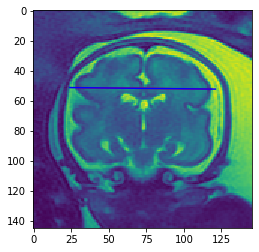

In [33]:
#Full pipeline
in_img_file = "/media/df3-dafna/Netanell/DemoCode/Pat02_Se06_Res0.7422_0.7422_Spac5.nii"
out_dir = "/media/df3-dafna/Netanell/DemoCode/Outputs"

metadata = {}
metadata["InFile"] = in_img_file
metadata["OutDir"] = out_dir

#First stage - Segmentation
f.predict(in_img_file, out_dir)
seg_file = os.path.join(out_dir, "prediction.nii.gz")
subseg_file = os.path.join(out_dir, "subseg.nii.gz")


#Second stage - Slice select
sl_tcd_result = sl_tcd.execute(img_file=in_img_file,
                seg_file=seg_file,)
sl_tcd_slice = int(sl_tcd_result["prediction"].values[0])
metadata["TCD_selection"] = sl_tcd_slice
metadata["TCD_result"] = sl_tcd_result.prob_vec.tolist()

sl_bbd_result = sl_bbd.execute(img_file=in_img_file,
                seg_file=seg_file,)
sl_bbd_slice = int(sl_bbd_result["prediction"].values[0])
metadata["BBD_selection"] = sl_bbd_slice
metadata["BBD_result"] = sl_bbd_result.prob_vec.tolist()



data_cropped, fullseg = sl_tcd.get_cropped_elem(img_file=in_img_file,
                                                seg_file=seg_file,)

data_cropped = data_cropped.transpose([1,2,0])
fullseg = fullseg.transpose([1,2,0])
nii_data_cropped = nib.Nifti1Image(data_cropped, affine=np.eye(4))
nib.save(nii_data_cropped, os.path.join(out_dir, "cropped.nii.gz"))

#Third stage - Sub segmentaion

predict_nifti(data_cropped.copy(), subseg_file, learn)
subseg = nib.load(subseg_file).get_fdata()
#Fourth stage - MSL
msl_p_planes = msl.find_planes(data_cropped, subseg)
msl_p_points = msl.findMSLforAllPlanes(data_cropped, subseg, msl_p_planes)
metadata["msl_planes"] = msl_p_planes
metadata["msl_points"] = msl_p_points


#Fifth - Measuring

# BBD + CBD
p_u, p_d, _ = msl_p_points[sl_bbd_slice]
CBD_left, CBD_right, m_CBD_x, m_CBD_y = CBD_BBD.CBD_points(fullseg[:,:,sl_bbd_slice], data_cropped[:,:,sl_bbd_slice], p_u.astype(int), p_d.astype(int), 0.7422, 0.7422)
metadata["cbd_points"] = (CBD_left, CBD_right)

_,_, BBD_left, BBD_right, _,_ = CBD_BBD.BBD_points(data_cropped[:,:,sl_bbd_slice], CBD_left, CBD_right, m_CBD_x, m_CBD_y) 
metadata["bbd_points"] = (BBD_left, BBD_right)

print (np.linalg.norm(CBD_left- CBD_right) * 0.7422, np.linalg.norm(BBD_left- BBD_right) * 0.7422)
plt.figure()
plt.imshow(data_cropped[:,:,sl_bbd_slice])
cbd = np.stack([CBD_left,CBD_right]).T
plt.plot(cbd[1,:], cbd[0,:], 'r')
bbd = np.stack([BBD_left,BBD_right]).T
plt.plot(bbd[1,:], bbd[0,:], 'b-')

# TCD

#Dump metadata
with open(os.path.join(out_dir,'data.json'), 'w') as fp:
    json.dump(metadata, fp, cls=NumpyEncoder)

ValueError: min() arg is an empty sequence

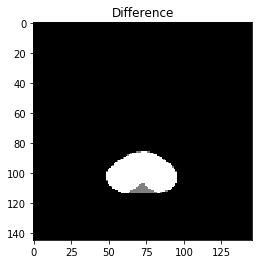

In [16]:
p_u, p_d, _ = msl_p_points[sl_tcd_slice]
CBD_left, CBD_right, m_CBD_x, m_CBD_y = CBD_BBD.CBD_points(subseg[:,:,sl_tcd_slice]==2., data_cropped[:,:,sl_tcd_slice], p_u.astype(int), p_d.astype(int), 0.7422, 0.7422, plot=True)

NameError: name 'np' is not defined

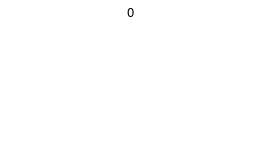

In [30]:
sl_tcd_result = sl_tcd.execute(img_file=in_img_file,
                seg_file=seg_file,)
sl_tcd_slice = int(sl_tcd_result["prediction"].values[0])

sl_bbd_result = sl_bbd.execute(img_file=in_img_file,
                seg_file=seg_file,visualize=True)
sl_bbd_slice = int(sl_bbd_result["prediction"].values[0])

In [32]:
json.dumps(sl_tcd_result.prob_vec.tolist(), cls=NumpyEncoder)

'[[[4.652483940124512, -3.9454996585845947], [3.599743604660034, -1.9251716136932373], [4.011938571929932, -3.843461751937866], [3.867180109024048, -3.2434518337249756], [3.215468168258667, -2.1623642444610596], [2.8658478260040283, -2.3085744380950928], [3.3975465297698975, -2.7650394439697266], [2.7821390628814697, -2.809302806854248], [2.6430985927581787, -2.3786823749542236], [3.8919472694396973, -4.40563440322876], [1.9963204860687256, -2.138749599456787], [-2.307117462158203, 2.921851873397827], [-0.9327293634414673, 2.583634614944458], [2.8615379333496094, -0.8325473070144653], [2.9939725399017334, -1.7044962644577026], [4.135481834411621, -2.6617431640625], [4.465362548828125, -2.547814130783081], [4.1122894287109375, -3.536234140396118]]]'